In [178]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import scipy.ndimage

In [179]:
img = 'stitched_pan2.png'

In [180]:
img = cv2.imread(img)
H_transform = np.load('H_transform.npy')

In [181]:
def transform_point(pt):
    pt_homogeneous = np.array([pt[0], pt[1], 1])
    pt_transformed = H_transform @ pt_homogeneous
    pt_transformed /= pt_transformed[2]  # convert from homogeneous to euclidean coordinates
    return (int(pt_transformed[0]), int(pt_transformed[1]))

In [182]:
# Define polygon coordinates
polygon = np.array([[0, 188], [655, 203], [617, 655], [0, 655]], np.int32)
polygon = polygon.astype(int)  # convert the coordinates to integer
polygon = polygon.reshape((-1, 1, 2))

In [183]:
scale_factor = 0.75
points = []
with open('rawlogtest.txt', 'r') as file:
    for line in file:
        if "detected at" in line:
            tracker_id = int(line.split("Tracker")[1].split(":")[0].strip())
            coordinates = re.findall(r'\((.*?)\)', line)[0]  # Extract coordinates
            x, y = map(int, coordinates.split(","))

            
            if tracker_id == 1:  # Check if this is Tracker 1
                x, y = transform_point((x, y))
            else:
                x += 200         # Taking into account padding that was done to acquire original stitched image
                
            x = int(x * scale_factor)
            y = int(y * scale_factor)
            
            if cv2.pointPolygonTest(polygon, (x, y), False) >= 0 and tracker_id == 0:
                continue
                
            print(f"Tracker {tracker_id}: ({x}, {y})")
            
            # Draw the point on the image
            points.append((x, y))


Tracker 0: (597, 63)
Tracker 0: (585, 54)
Tracker 0: (572, 46)
Tracker 0: (558, 39)
Tracker 0: (543, 33)
Tracker 0: (530, 30)
Tracker 0: (515, 28)
Tracker 0: (501, 29)
Tracker 0: (486, 34)
Tracker 0: (470, 41)
Tracker 0: (455, 48)
Tracker 0: (440, 53)
Tracker 0: (427, 57)
Tracker 0: (417, 58)
Tracker 0: (404, 54)
Tracker 0: (390, 49)
Tracker 0: (376, 42)
Tracker 0: (362, 34)
Tracker 0: (348, 26)
Tracker 0: (336, 21)
Tracker 0: (327, 17)
Tracker 0: (316, 14)
Tracker 0: (305, 15)
Tracker 0: (293, 18)
Tracker 0: (279, 22)
Tracker 0: (262, 27)
Tracker 0: (248, 34)
Tracker 0: (236, 42)
Tracker 0: (227, 47)
Tracker 0: (216, 61)
Tracker 0: (210, 72)
Tracker 0: (205, 89)
Tracker 0: (199, 106)
Tracker 0: (194, 124)
Tracker 0: (187, 141)
Tracker 0: (183, 156)
Tracker 0: (177, 165)
Tracker 0: (165, 176)
Tracker 0: (154, 184)
Tracker 1: (151, 194)
Tracker 1: (141, 198)
Tracker 1: (127, 205)
Tracker 1: (111, 213)
Tracker 1: (96, 220)
Tracker 1: (63, 247)
Tracker 1: (59, 254)
Tracker 1: (51, 268)
Tr

In [184]:
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [195]:
for i in range(0, len(points)):
    if distance(points[i - 1], points[i]) < 120:
        cv2.line(img, points[i - 1], points[i], (255,59,203), thickness = 2)
        
cv2.circle(img, points[0], 10, (1, 150, 32), -1)
cv2.circle(img, points[-1], 10, (255, 0, 50), -1)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [135, 133, 132],
        [135, 133, 133],
        [134, 132, 132]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [135, 133, 132],
        [135, 133, 133],
        [134, 132, 132]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [135, 133, 132],
        [135, 133, 133],
        [134, 132, 132]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

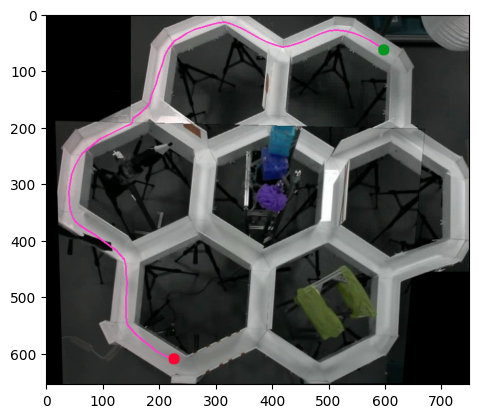

In [196]:
plt.imshow(img)